age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
#For uploading and accessing the data
import numpy as np
import pandas as pd
#For visualizations
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv' , sep=',' , encoding='utf8')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
survived = df [ df['target']==0]
survived

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
no_survived = df [ df['target']==1 ]
no_survived 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
print('Number of Survived passengers = ', len(survived))
print('Percentage Survived = ', len(survived)/len(df) * 100 , '%' )

Number of Survived passengers =  138
Percentage Survived =  45.54455445544555 %


In [9]:
print('Number of passengers who did not survive = ', len(no_survived))
print('Percentage No Survived = ', len(no_survived)/len(df) * 100 , '%' )

Number of passengers who did not survive =  165
Percentage No Survived =  54.45544554455446 %


In [10]:
for gen in df['sex'].unique():
    print(gen)
    gender_df = df[ df['sex']==gen ]
    survived = gender_df[ gender_df['target']==1 ]
    survived_percentage = ( survived.shape[0] / gender_df.shape[0] ) * 100
    print("Count: ", gender_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n=====\n")

1
Count:  207
Servived  :  44.93 %

=====

0
Count:  96
Servived  :  75.00 %

=====



<AxesSubplot:xlabel='cp', ylabel='count'>

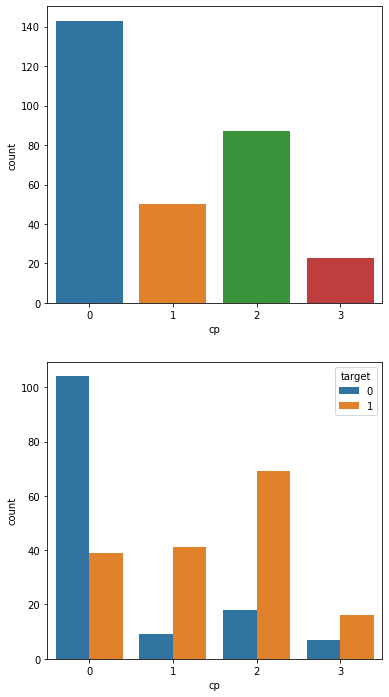

In [11]:
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot( x= 'cp', data = df)
plt.subplot(212)
sns.countplot(x='cp', hue = 'target', data = df)

<AxesSubplot:xlabel='restecg', ylabel='count'>

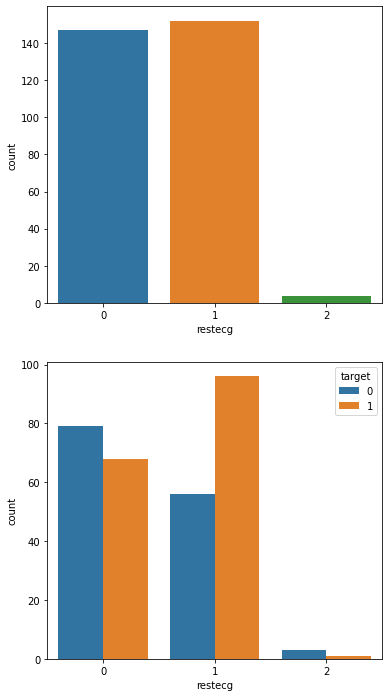

In [12]:
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot( x= 'restecg', data = df)
plt.subplot(212)
sns.countplot(x='restecg', hue = 'target', data = df)

<AxesSubplot:xlabel='fbs', ylabel='count'>

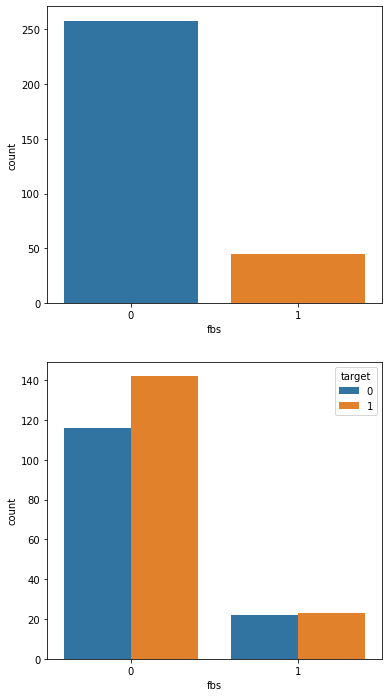

In [13]:
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot( x= 'fbs', data = df)
plt.subplot(212)
sns.countplot(x='fbs', hue = 'target', data = df)

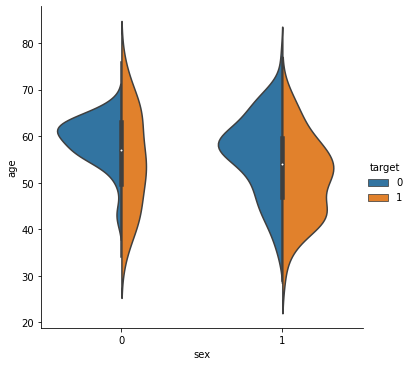

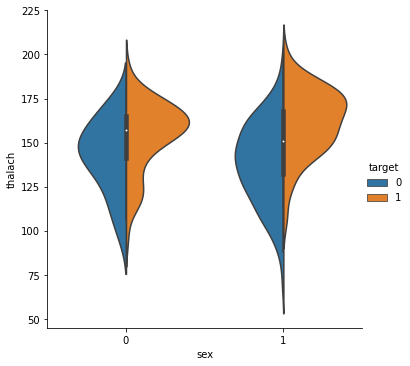

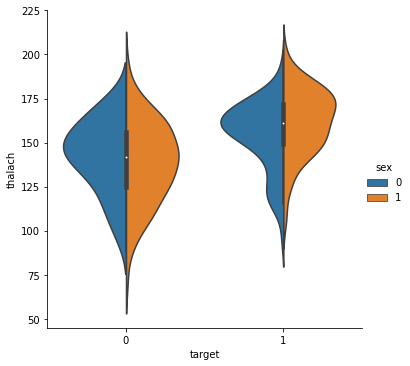

In [14]:
sns.catplot(data=df, kind="violin", x="sex", y="age", hue="target", split=True,legend=True)
sns.catplot(data=df, kind="violin", x="sex", y="thalach", hue="target", split=True,legend=True)
sns.catplot(data=df, kind="violin", x="target", y="thalach", hue="sex", split=True,legend=True)

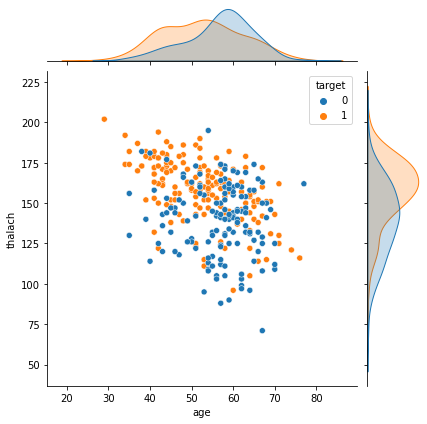

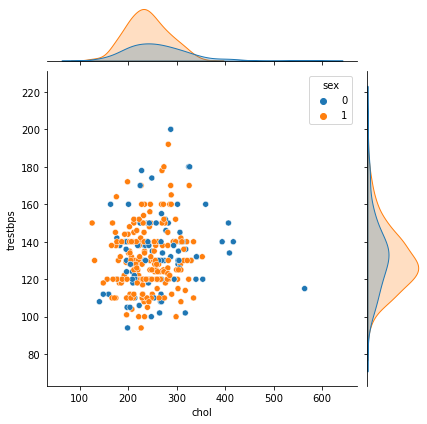

In [15]:
sns.jointplot(data=df, x="age", y="thalach", hue="target")
sns.jointplot(data=df, x="chol", y="trestbps", hue="sex")

In [16]:
data={ 'age':df['age'], 'oldpeak':df['oldpeak'] ,'trestbps':df['trestbps'],'chol':df['chol'],'target':df['target']}
data1=pd.DataFrame(data)
data1

,age,oldpeak,trestbps,chol,target
0,63,2.3,145,233,1
1,37,3.5,130,250,1
2,41,1.4,130,204,1
3,56,0.8,120,236,1
4,57,0.6,120,354,1
...,...,...,...,...,...
298,57,0.2,140,241,0
299,45,1.2,110,264,0
300,68,3.4,144,193,0
301,57,1.2,130,131,0


<Figure size 2160x2520 with 0 Axes>

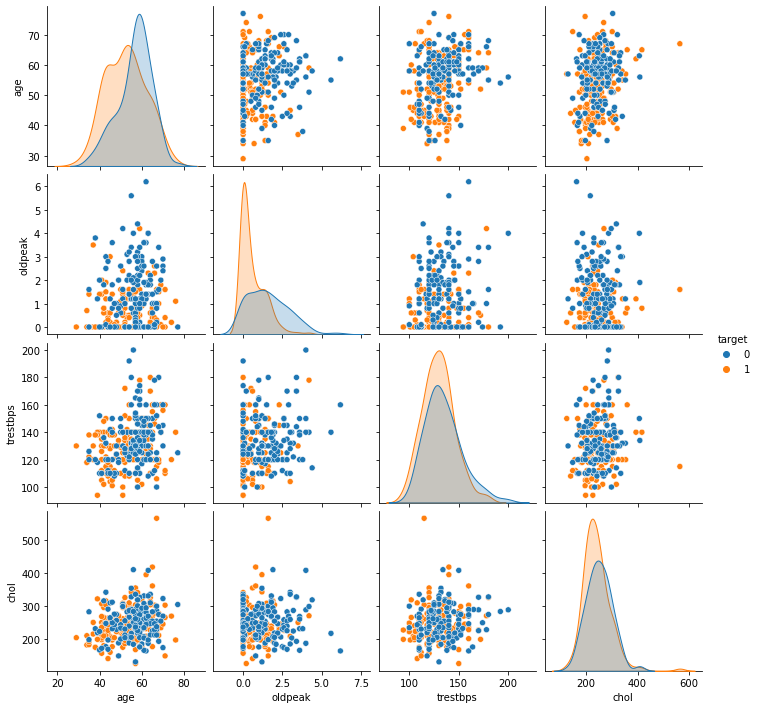

In [17]:
plt.figure(figsize=(30 ,35))
sns.pairplot(data=data1, hue="target")

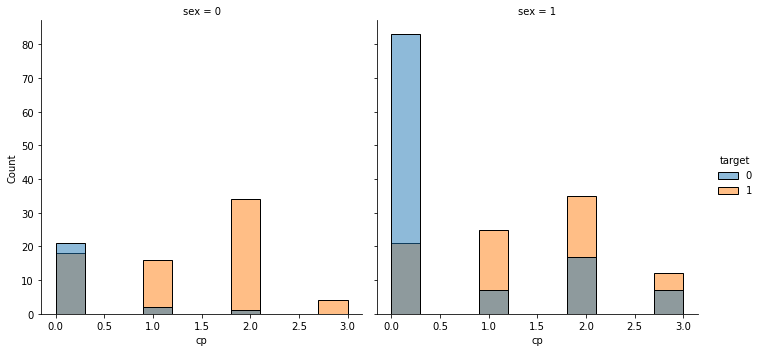

In [18]:
sns.displot(data=df, x="cp", hue="target", col="sex")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [20]:
X =df.drop('target',axis=1).values
Y=df['target'].values


In [21]:
X.shape

(303, 13)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [24]:
print(clf.feature_importances_)

[0.08473489 0.02718163 0.13495774 0.06723992 0.09300563 0.00948628
 0.02326104 0.12612921 0.06585492 0.11183729 0.04329235 0.10255794
 0.11046115]


In [25]:
df.tail(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [26]:
y_predict_test=clf.predict(X_test)
y_predict_test

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

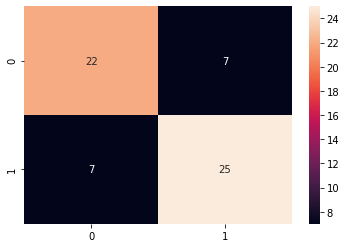

In [28]:
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot = True)